## load the data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")



In [44]:
data_path = '../data/heart_disease.csv'

df = pd.read_csv(data_path)

NUMERIC_COLS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
CATEGORICAL_COLS = [f for f in df.columns if f not in NUMERIC_COLS]

df.head(2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_2,cp_3,cp_4,restecg_1,restecg_2,thal_6,thal_7
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,0.0,0,0,0,0,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,3.0,1,0,0,1,0,1,0,0


In [45]:
# split the data
X = df.drop("target", axis=1)
y = df["target"]

In [46]:
# scale the numeric data
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[NUMERIC_COLS] = scaler.fit_transform(X_scaled[NUMERIC_COLS])

# Finding optimal K

In [47]:
# Elbow method to find optimal k
inertias = []

# store WCSS every k clusters
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled)
    inertias.append(model.inertia_)

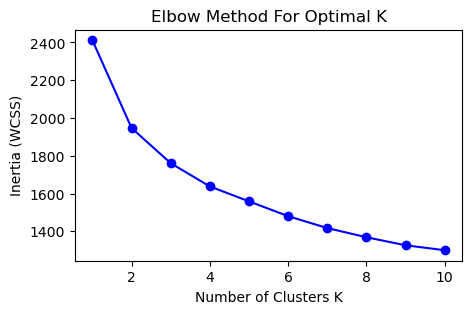

In [48]:
plt.figure(figsize=(5,3))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()

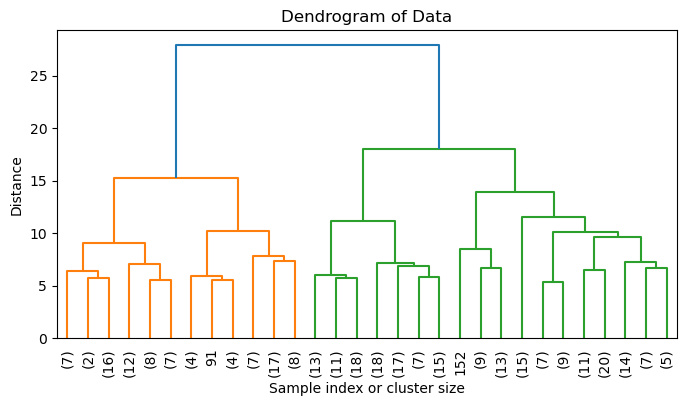

In [49]:
# dendogram for estimating number of clusters
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# plot the dendogram
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Data')
plt.xlabel('Sample index or cluster size')
plt.ylabel('Distance')
plt.show()

# K Means

In [50]:
# train kmeans model with optimal k
k = 2

# Fit KMeans on original data
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

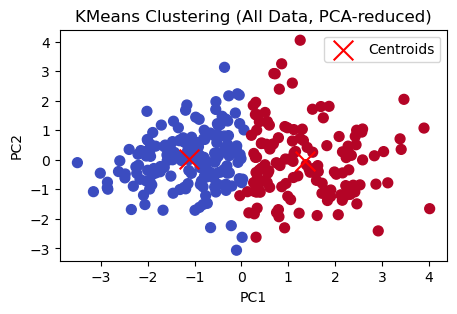

In [51]:
# Reduce dataset to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Scatter plot in 2D
plt.figure(figsize=(5,3))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, cmap='coolwarm', s=50)

# Plot reduced centroids
centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1],
            c='red', s=200, marker='x', label='Centroids')

plt.title("KMeans Clustering (All Data, PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Heirarchical clustering

In [52]:
# train heirarchical model with optimal k
k = 2
hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

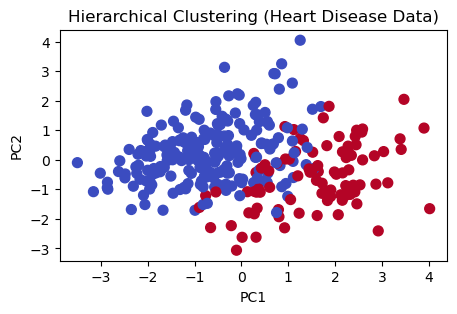

In [53]:
# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(5,3))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap='coolwarm', s=50)
plt.title("Hierarchical Clustering (Heart Disease Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Compare both algorithms

In [54]:
# metrics for evaluation
print("KMeans Confusion Matrix:\n", confusion_matrix(y, y_kmeans))
print("\nKmeans Recall:", round(recall_score(y, y_kmeans), 2))

print("\nHierarchical Confusion Matrix:\n", confusion_matrix(y, y_hc))
print("\nHierarchical Recall:", round(recall_score(y, y_hc), 2))

KMeans Confusion Matrix:
 [[128  36]
 [ 38 101]]

Kmeans Recall: 0.73

Hierarchical Confusion Matrix:
 [[151  13]
 [ 59  80]]

Hierarchical Recall: 0.58


missing a sick patient (FN) is far worse than misclassifying a healthy one (FP)<br/>
so we used **Recall (Sensitivity, True Positive Rate)** metric